In [1]:
import config
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import utils

In [2]:
fig_save_path = Path("figures")
fig_save_path.mkdir(exist_ok=True)

In [3]:
# Load the OneStopQA dataset
onestop_qa = load_dataset(
    "onestop_qa", split="train", trust_remote_code=True
).to_pandas()

Using the latest cached version of the module from /Users/ellalion/.cache/huggingface/modules/datasets_modules/datasets/onestop_qa/a0c95605076648b72908ed622b90af2ec131356d12bbc08bb6f26bef7758e44b (last modified on Mon Apr 15 16:05:00 2024) since it couldn't be found locally at onestop_qa, or remotely on the Hugging Face Hub.


In [4]:
QUESTIONNAIRE = utils.load_json(config.QUESTIONNAIRE_PATH)
SESSION_SUMMARY = utils.load_df(config.SESSION_SUMMARY_PATH)

In [5]:
IA_P = utils.load_df(config.IA_P_PATH)
IA_Q = utils.load_df(config.IA_Q_PATH)
IA_A = utils.load_df(config.IA_A_PATH)
IA_Q_preview = utils.load_df(config.IA_Q_preview_PATH)
IA_T = utils.load_df(config.IA_T_PATH)
IA_QA = utils.load_df(config.IA_QA_PATH)

# 1.1.1 Key Statistics

In [6]:
# Calculate the lengths
p = len(IA_P)
q = len(IA_Q)
a = len(IA_A)
qa = len(IA_QA)
q_pre = len(IA_Q_preview)
t = len(IA_T)
total = p + q + a + t + q_pre

# Consolidated print statement
print(
    f"Number of tokens in IA reports:\nparagraphs - {p}\nquestions - {q}\nquestions and answers - {qa}\nquestions preview - {q_pre}\ntitles - {t}\ntotal words - {total}"
)

Number of tokens in IA reports:
paragraphs - 2632159
questions - 242208
questions and answers - 1190732
questions preview - 121110
titles - 38798
total words - 3982709


In [7]:
def count_lines_prticipant(df):
    return df.groupby(["RECORDING_SESSION_LABEL", "batch", "article_id", "paragraph_id", "reread"]).size()

ia_qa = count_lines_prticipant(IA_QA).to_dict()
ia_q = count_lines_prticipant(IA_Q).to_dict()
ia_a = count_lines_prticipant(IA_A).to_dict()

def merge_dicts_values(dict1, dict2):
    merge = {}
    for key in dict1:
        try:
            merge[key] = dict1[key] + dict2[key]   
        except KeyError:
            print(f"KeyError: {key}")
    return merge

ia_q_a = merge_dicts_values(ia_q, ia_a)

def diff_dicts_values(dict1, dict2):
    diff = {}
    for key in dict1:
        diff[key] = dict1[key] - dict2[key]
    return diff

print(diff_dicts_values(ia_qa, ia_q_a))

def count_trials_prticipant(df):
    return df.groupby(["article_id", "paragraph_id", "reread"]).size()

l55_519_qa = count_trials_prticipant(IA_QA[IA_QA["RECORDING_SESSION_LABEL"] == "l55_519"]).to_dict()
l55_519_q = count_trials_prticipant(IA_Q[IA_Q["RECORDING_SESSION_LABEL"] == "l55_519"]).to_dict()
l55_519_a = count_trials_prticipant(IA_A[IA_A["RECORDING_SESSION_LABEL"] == "l55_519"]).to_dict()
l56_489_qa = count_trials_prticipant(IA_QA[IA_QA["RECORDING_SESSION_LABEL"] == "l56_489"]).to_dict()
l56_489_q = count_trials_prticipant(IA_Q[IA_Q["RECORDING_SESSION_LABEL"] == "l56_489"]).to_dict()
l56_489_a = count_trials_prticipant(IA_A[IA_A["RECORDING_SESSION_LABEL"] == "l56_489"]).to_dict()


KeyError: ('l55_519', 2, 9, 2, 0)
KeyError: ('l56_489', 1, 10, 6, 0)


KeyError: ('l55_519', 2, 9, 2, 0)

In [8]:

l55_519_qa = IA_QA.query("RECORDING_SESSION_LABEL == 'l55_519' & batch==2 & article_id==9 & paragraph_id==2 & reread==0")
l55_519_q = IA_Q.query("RECORDING_SESSION_LABEL == 'l55_519' & batch==2 & article_id==9 & paragraph_id==2 & reread==0")
l55_519_a = IA_A.query("RECORDING_SESSION_LABEL == 'l55_519' & batch==2 & article_id==9 & paragraph_id==2 & reread==0")

fields = ["IA_LABEL", "IA_ID", "IA_DWELL_TIME", "TRIAL_INDEX"]
print(f"qa - {l55_519_qa[fields]}")
print(f"q - {l55_519_q[fields]}")
print(f"a - {l55_519_a[fields]}")


l56_489_qa = IA_QA.query("RECORDING_SESSION_LABEL == 'l56_489' & batch==1 & article_id==10 & paragraph_id==6 & reread==0")
l56_489_q = IA_Q.query("RECORDING_SESSION_LABEL == 'l56_489' & batch==1 & article_id==10 & paragraph_id==6 & reread==0")
l56_489_a = IA_A.query("RECORDING_SESSION_LABEL == 'l56_489' & batch==1 & article_id==10 & paragraph_id==6 & reread==0")

print(f"qa - {l56_489_qa[fields]}")
print(f"q - {l56_489_q[fields]}")
print(f"a - {l56_489_a[fields]}")

qa -             IA_LABEL  IA_ID  IA_DWELL_TIME  TRIAL_INDEX
329165           Why      1            200           33
329166           Why      1              0           33
329167            do      2              0           33
329168            do      2              0           33
329169          some      3              0           33
329170          some      3              0           33
329171        people      4           1051           33
329172        people      4              0           33
329173       support      5            118           33
329174       support      5              0           33
329175     Bolivia's      6            832           33
329176     Bolivia's      6              0           33
329177     position?      7            506           33
329178     position?      7              0           33
329179       Because      8            151           33
329180          they      9              0           33
329181       believe     10            154 

# 1.1.2 Participants

In [9]:
print(f"Total number of participants: {len(SESSION_SUMMARY)}")

Total number of participants: 360


In [10]:
# Questionnaire json to dataframe filled missing values with NaN
questionnaire_df = pd.DataFrame(QUESTIONNAIRE)

In [11]:
# gender
gender = questionnaire_df["Gender"]
labels, counts = np.unique(gender, return_counts=True)
print(
    f"{labels[0]} - {counts[0]}, {labels[1]} - {counts[1]}, {labels[2]} - {counts[2]}"
)

female - 238, male - 117, other - 5


In [12]:
print(
    f"Age mean - {round(questionnaire_df['Age'].mean(), ndigits=1)}, \
    Age std - {round(questionnaire_df['Age'].std(), 1)}"
)

Age mean - 22.8,     Age std - 5.8


In [13]:
# Balanced Bilinguals
counter = 0
for languages in questionnaire_df["Languages"]:
    if isinstance(languages, list):
        for lang in languages:
            if lang.get("Language Proficiency") == "native":
                counter += 1
print(f"Number of balanced bilinguals: {counter}")

# Number of Additional Languages
par_dict = {}
participants_additional_languages = questionnaire_df["Languages"]
par_languages = []
speak = []
for participant_add_lang in participants_additional_languages:
    if isinstance(participant_add_lang, list):
        for l in participant_add_lang:
            par_languages.append(l.get("Language"))
        speak.append(len(participant_add_lang))
    else:
        participant_add_lang = ""
        speak.append(len(participant_add_lang))
lang, counts = np.unique(par_languages, return_counts=True)
language = dict(zip(lang, counts))
num_of_l, c = np.unique(speak, return_counts=True)
num_of_languages = dict(zip(num_of_l, c))
plus_5 = [min(p_5, 5) for p_5 in speak]
num_of_l_5, c_5 = np.unique(plus_5, return_counts=True)
num_of_lang_plus_5 = dict(zip(num_of_l_5, c_5))

Number of balanced bilinguals: 29


In [14]:
# The mean English Age of Acquisition
print(
    f'Mean age of acquisition (AoA) - {round(np.mean(questionnaire_df["English AoA"]),1)}'
)

Mean age of acquisition (AoA) - 0.4


In [15]:
# participants university affiliation
uni_affiliation = sum(questionnaire_df["University Affiliation"] == "yes")
print(f"Number of participants with university affiliation: {uni_affiliation}")

uni_institutions = questionnaire_df["University Institution"].dropna()
institution_mapping = {
    "mit": "MIT",
    "Technion": "Technion",
}
uni_institutions_grouped = uni_institutions.apply(
    lambda x: institution_mapping.get(x, "Other")
)

institutions_labels, institutions_counts = np.unique(
    uni_institutions_grouped, return_counts=True
)
print("University Institutions and their counts:")
for i_label, i_count in zip(institutions_labels, institutions_counts):
    print(f"{i_label}: {i_count}")

uni_roles = questionnaire_df["University Role"].dropna()
roles_mapping = {
    "undergrad": "Undergrad",
    "grad": "Grad",
    "faculty": "Faculty",
    "admin": "Admin",
}
uni_roles_grouped = uni_roles.apply(lambda x: roles_mapping.get(x, "Other"))
role_labels, role_counts = np.unique(uni_roles_grouped, return_counts=True)
print("University Roles and their counts:")
for r_label, r_count in zip(role_labels, role_counts):
    print(f"{r_label}: {r_count}")

Number of participants with university affiliation: 289
University Institutions and their counts:
MIT: 207
Other: 63
Technion: 19
University Roles and their counts:
Admin: 4
Faculty: 13
Grad: 39
Other: 8
Undergrad: 225


/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_70965/2596196557.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set(xticklabels=education_labels)
/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_70965/2596196557.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set(xticklabels=add_lang_labels)


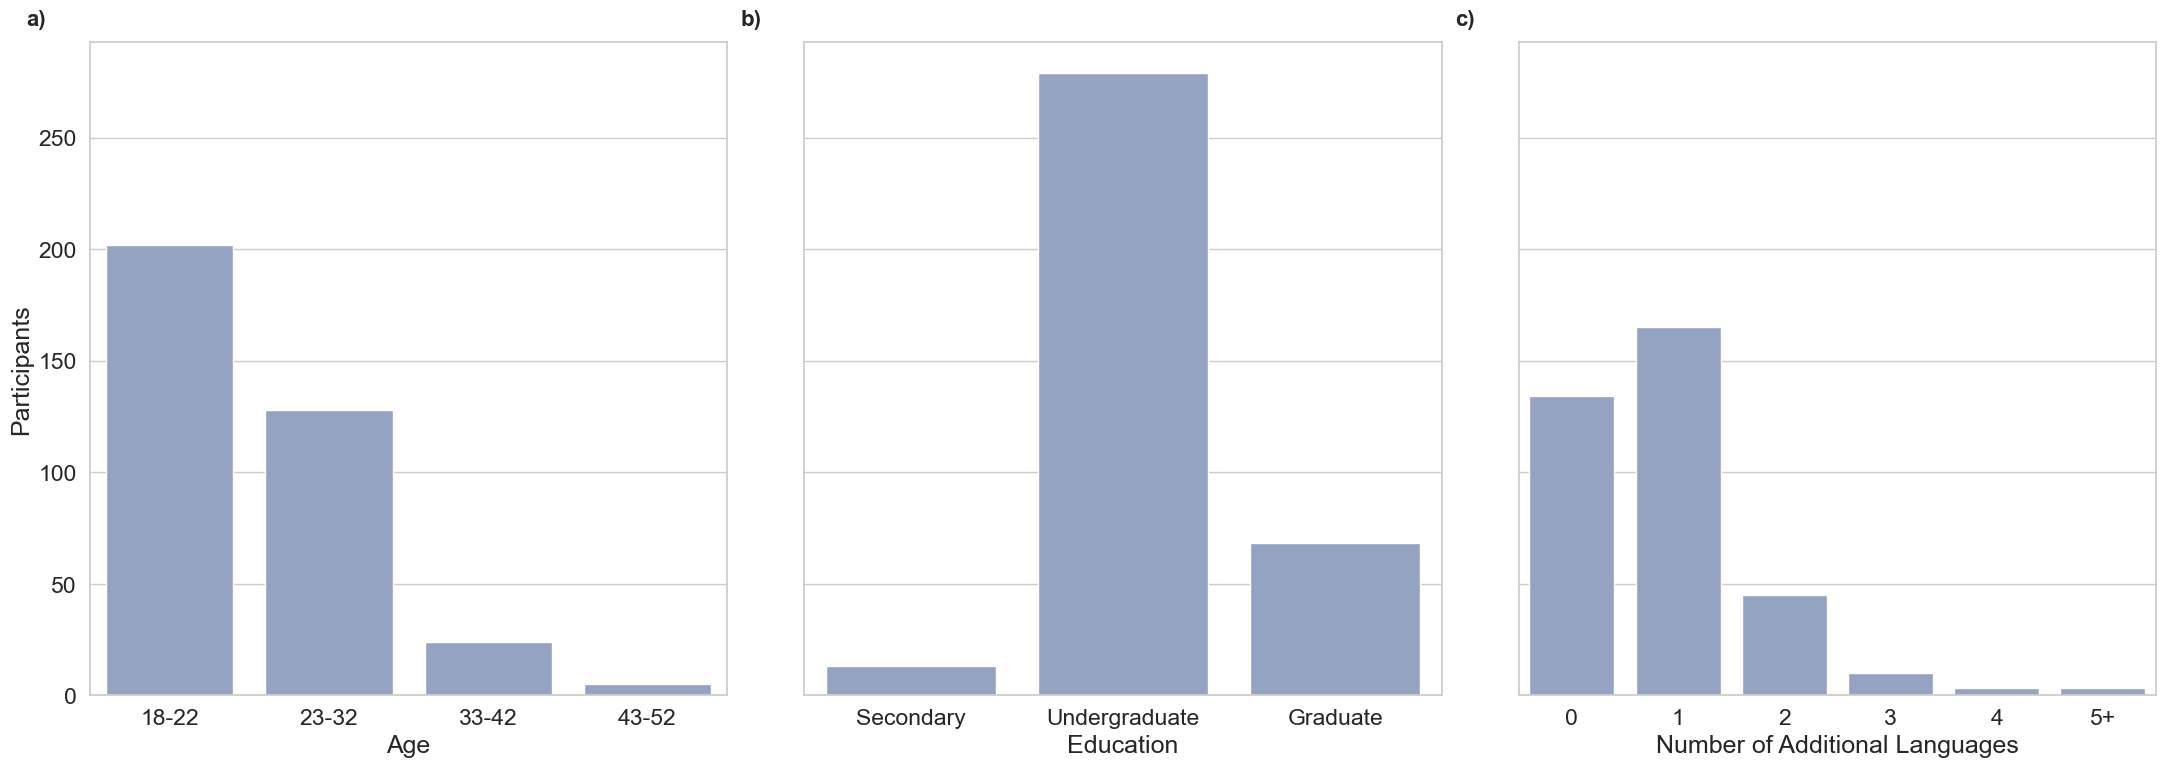

In [16]:
# Create Figure 1: Demographics
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
fig_colors = "#8da0cb"  # "#a1c9f4"
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8), sharey="row")
sns.set_style("whitegrid")

# Plot 1: Countplot for Age
age_bins = [18, 22, 32, 42, 52]
age_labels = ["18-22", "23-32", "33-42", "43-52"]
data = questionnaire_df.copy()
data["age_category"] = pd.cut(
    data["Age"], bins=age_bins, labels=age_labels, right=False
)
sns.countplot(
    data=data, x="age_category", color=fig_colors, ax=axes[0], order=age_labels
)
axes[0].set(ylabel="Participants")
axes[0].set(xlabel="Age")

# Plot 2: Countplot for Level of Education
education_order = ["secondary", "college", "postgrad"]
education_labels = ["Secondary", "Undergraduate", "Graduate"]
sns.countplot(
    data=data, x="Education Level", color=fig_colors, ax=axes[1], order=education_order
)
axes[1].set(xticklabels=education_labels)
axes[1].set(ylabel="")
axes[1].set(xlabel="Education")

# Plot 3: Barplot for Number of Additional Languages
add_lang_labels = ["0", "1", "2", "3", "4", "5+"]
axes[2] = sns.barplot(
    x=list(num_of_lang_plus_5.keys()),
    y=list(num_of_lang_plus_5.values()),
    color=fig_colors,
    ax=axes[2],
)
axes[2].set(ylabel="")
axes[2].set(xlabel="Number of Additional Languages")
axes[2].set(xticklabels=add_lang_labels)

# Add labels (a, b, c) to each subplot
axes[0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[2].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[2].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "demographics.pdf")

# Show the plot
plt.show()

## 1.1.3 Calibration Quality

In [17]:
# mean number of calibration sessions during an experiment
session_interruptions = SESSION_SUMMARY["Recalibration_Count"]
print(f"Mean number of recalibrations: {round(np.mean(session_interruptions),1)}")

# mean number of calibration attempts per calibration session
mean_calibrations_per_session = sum(SESSION_SUMMARY["Total_Recalibrations"]) / sum(SESSION_SUMMARY["Recalibration_Count"])
print(f"Mean number of calibrations per-recalibration session: {round(mean_calibrations_per_session,1)}")

Mean number of recalibrations: 6.7
Mean number of calibrations per-recalibration session: 1.3


In [18]:
# Percent validation error over 0.3
validation_error = pd.read_csv(config.BASE_PATH / "validation_error.csv")
over_03 = validation_error[["num_over_03", "total_trials"]].sum()

percentage_over_03 = round(over_03["num_over_03"] / over_03["total_trials"] * 100, 1)
percentage_avg_error_over_03 = round(
    (validation_error["avg_avg_val_error"] > 0.3).sum() / 360 * 100, 1
)

print(f"Percentage of Trials Over 0.3 Error: {percentage_over_03}%")
print(f"Percentage of Validation Errors Over 0.3: {percentage_avg_error_over_03}%")

Percentage of Trials Over 0.3 Error: 15.5%
Percentage of Validation Errors Over 0.3: 8.9%


# 1.1.4 Experiment Duration

In [32]:
print(f'mean duration (in minutes) - {round(np.mean(SESSION_SUMMARY["Session_Duration"]),1)}')
print(f'mean total duration (in minutes) - {round(np.mean(SESSION_SUMMARY["Total_Session_Duration"]),1)}')
print(f'total duration of eye movements recordings (in hours) - {round(np.sum(SESSION_SUMMARY["Session_Duration"])/60,1)}')

mean duration (in minutes) - 44.3
mean total duration (in minutes) - 55.7
total duration of eye movements recordings (in hours) - 265.8


In [33]:
hunting = SESSION_SUMMARY[SESSION_SUMMARY["Question_Preview"] == True]
gathering = SESSION_SUMMARY[SESSION_SUMMARY["Question_Preview"] == False]
h_session_duration = hunting["Session_Duration"]
g_session_duration = gathering["Session_Duration"]
print(f"mean hunting duration - {round(np.mean(h_session_duration),1)}")
print(f"mean gathering duration - {round(np.mean(g_session_duration),1)}")
h_total_session_duration = hunting["Total_Session_Duration"]
g_total_session_duration = gathering["Total_Session_Duration"]
print(f"total mean hunting duration - {round(np.mean(h_total_session_duration),1)}")
print(f"total mean gathering duration - {round(np.mean(g_total_session_duration),1)}")

mean hunting duration - 43.3
mean gathering duration - 45.3
total mean hunting duration - 54.3
total mean gathering duration - 57.1


In [ ]:
# paragraph duration
ia_p = IA_P.drop_duplicates(subset=["RECORDING_SESSION_LABEL", "batch", "article_id", "paragraph_id", "reread"]) # change to "Participant ID"
ia_h_duration = ia_p[ia_p["batch_condition"] == "p"]
ia_g_duration = ia_p[ia_p["batch_condition"] == "n"]
ia_p = ia_p.groupby("RECORDING_SESSION_LABEL").sum()
ia_h_duration = ia_h_duration.groupby("RECORDING_SESSION_LABEL").sum()
ia_g_duration = ia_g_duration.groupby("RECORDING_SESSION_LABEL").sum()
print(f"mean p - {round((ia_p['PARAGRAPH_RT']/1000/60).mean(),1)}")
print(f"sum p - {round(sum(ia_p['PARAGRAPH_RT']),1)/1000/60/60}")
print(f"p hunting - {round((ia_h_duration['PARAGRAPH_RT']/1000/60).mean(),1)}")
print(f"p gathering - {round((ia_g_duration['PARAGRAPH_RT']/1000/60).mean(),1)}")
# q duration
print(f"mean q - {round((ia_p['QUESTION_RT']/1000/60).mean(),1)}")
print(f"q hunting - {round((ia_h_duration['QUESTION_RT']/1000/60).mean(),1)}")
print(f"q gathering - {round((ia_g_duration['QUESTION_RT']/1000/60).mean(),1)}")
# a duration
print(f"mean a - {round((ia_p['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
print(f"a hunting - {round((ia_h_duration['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
print(f"a gathering - {round((ia_g_duration['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
# q&a duration
print(f"mean qa - {round((ia_p['QUESTION_RT']/1000/60).mean() + (ia_p['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
print(f"qa hunting - {round((ia_h_duration['QUESTION_RT']/1000/60).mean() + (ia_h_duration['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
print(f"qa gathering - {round((ia_g_duration['QUESTION_RT']/1000/60).mean() + (ia_g_duration['CONFIRM_FINAL_ANSWER_RT']/1000/60).mean(),1)}")
# q_preview duration
print(f"q preview - {round((ia_h_duration['PREVIEW_QUESTION_RT']/1000/60).mean(),1)}")

trial_report = utils.load_df(config.TRIAL_PATH)

# Convert to numeric, setting invalid parsing as NaN
trial_report["PARAGRAPH_RT"] = pd.to_numeric(trial_report["PARAGRAPH_RT"], errors="coerce")

# Replace NaN values with 0 (or another default value if appropriate)
trial_report["PARAGRAPH_RT"].fillna(0, inplace=True)

# Convert to integers
trial_report["PARAGRAPH_RT"] = trial_report["PARAGRAPH_RT"].astype(int)

# calculate the difference between DURATION and PARAGRAPH_RT per paragraph, on average
trial_report["diff"] = trial_report["DURATION"] - trial_report["PARAGRAPH_RT"]
trial_report["total"] = trial_report["END_TIME"] - trial_report["START_TIME"]
trial_report["diff_total"] = trial_report["total"] - trial_report["PARAGRAPH_RT"]
print(f"mean difference between DURATION and PARAGRAPH_RT - {round((trial_report['diff']).mean(),1)}")
print(f"mean difference between total and PARAGRAPH_RT - {round((trial_report['diff_total']).mean(),1)}")


EXPERIMENT DURATION - 0.0
mean p - 26.0
sum p - 156.1760183333333
p hunting - 23.1
p gathering - 28.9
mean q - 2.6
q hunting - 2.5
q gathering - 2.7
mean a - 7.6
a hunting - 7.1
a gathering - 8.0
mean qa - 10.2
qa hunting - 9.6
qa gathering - 10.8
q preview - 3.5
mean difference between DURATION and PARAGRAPH_RT - 14487.4
mean difference between total and PARAGRAPH_RT - 14487.4


/var/folders/xz/v_bn9sxn4ld2lw3b85g8bpmw0000gn/T/ipykernel_70965/1747954298.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trial_report["PARAGRAPH_RT"].fillna(0, inplace=True)


# 1.1.5 Reading Comprehension Performance

In [35]:
# reading comprehension accuracy Hunting
comprehension_score = SESSION_SUMMARY.groupby(["Question_Preview"])["Comprehension_Score-Regular_Trials"].mean()
comprehension_hunting = comprehension_score[True]
# reading comprehension accuracy Gathering
comprehension_gathering = comprehension_score[False]

# reading comprehension accuracy re-reading Hunting
reread_comprehension_score = SESSION_SUMMARY.groupby(["Question_Preview"])["Comprehension_Score-Repeated_Reading"].mean()
reread_comprehension_hunting = reread_comprehension_score[True]
# reading comprehension accuracy re-reading Gathering
reread_comprehension_gathering = reread_comprehension_score[False]


print(
    f"Reading Comprehension Accuracy - Hunting (without reread): {comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (without reread): {comprehension_gathering.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Hunting (with reread): {reread_comprehension_hunting.round(1)}"
)
print(
    f"Reading Comprehension Accuracy - Gathering (with reread): {reread_comprehension_gathering.round(1)}"
)

Reading Comprehension Accuracy - Hunting (without reread): 86.9
Reading Comprehension Accuracy - Gathering (without reread): 81.2
Reading Comprehension Accuracy - Hunting (with reread): 90.6
Reading Comprehension Accuracy - Gathering (with reread): 84.2


# Figure 2

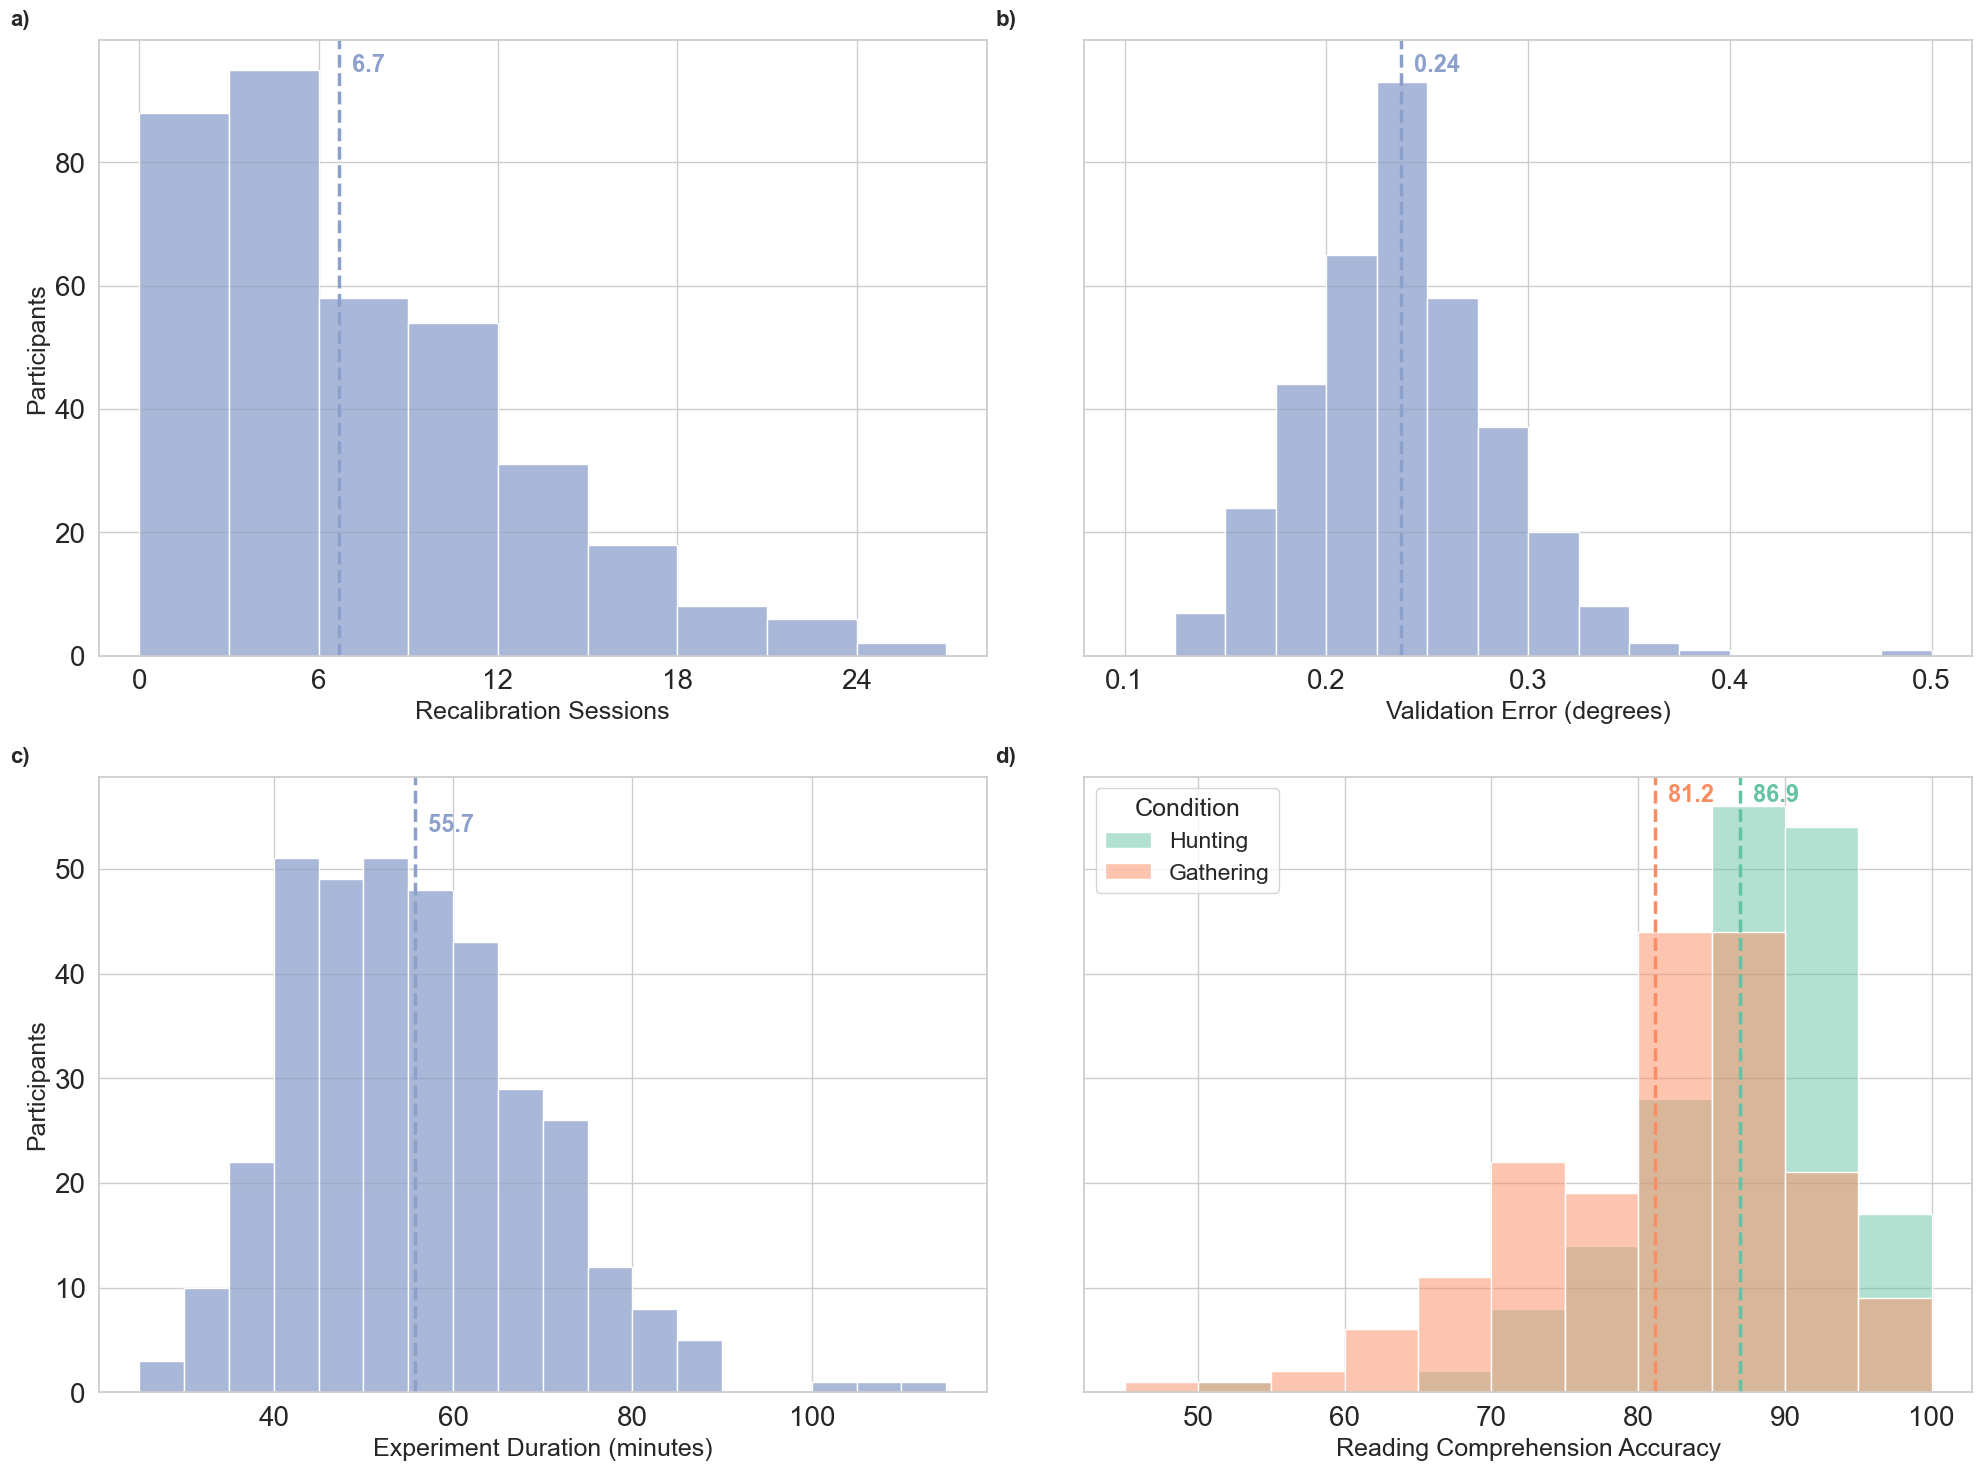

In [36]:
sns.set_context("paper", font_scale=2)
sns.set_theme(font_scale=1.5, style="whitegrid")
# Create Figure 2
fig_colors = "#8da0cb"
colors = ["#66c2a5", "#fc8d62"]
color_dict = {
    True: colors[0],
    False: colors[1],
}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey="row")

data = SESSION_SUMMARY.copy()
# Plot 1: Number of Recalibrations
axes[0, 0] = sns.histplot(
    data,
    x="Recalibration_Count",
    color=fig_colors,
    ax=axes[0, 0],
    binrange=(0, 27),
    binwidth=3,
)
axes[0, 0].set(ylabel="Participants")
axes[0, 0].set(xlabel="Recalibration Sessions")
axes[0, 0].axvline(session_interruptions.mean(), color=fig_colors, ls="--", lw=2.5)
axes[0, 0].set_xticks(np.arange(0, 28, 6))

# Display mean value as text on the plot
axes[0, 0].text(
    session_interruptions.mean(),  # x-coordinate (same as mean value)
    axes[0, 0].get_ylim()[1] * 0.95,  # y-coordinate (adjust as needed)
    f"  {session_interruptions.mean():.1f}",  # Label text
    color=fig_colors,
    ha="left",
    fontsize=17,
    fontweight="bold"
)

# Plot 2: Validations
axes[0, 1] = sns.histplot(
    data,
    x="Mean_Validation_Error",
    color=fig_colors,
    ax=axes[0, 1],
    binrange=(0.1, 0.5),
    binwidth=0.025,
)
axes[0, 1].set(ylabel="")
axes[0, 1].set(xlabel="Validation Error (degrees)")
axes[0, 1].axvline(
    data["Mean_Validation_Error"].mean(), color=fig_colors, ls="--", lw=2.5
)
axes[0, 1].set_xticks(np.arange(0.1, 0.51, 0.1))

axes[0, 1].text(
    data["Mean_Validation_Error"].mean(), 
    axes[0, 1].get_ylim()[1] * 0.95, 
    f"  {data["Mean_Validation_Error"].mean():.2f}", 
    color=fig_colors,
    ha="left",
    fontsize=17,
    fontweight="bold"
)

# Plot 3: Experiment Duration
axes[1, 0] = sns.histplot(
    data,
    x="Total_Session_Duration",
    color=fig_colors,
    ax=axes[1, 0],
    binrange=(25, 115),
    binwidth=5,
)
axes[1, 0].axvline(data["Total_Session_Duration"].mean(), color=fig_colors, ls="--", lw=2.5)
axes[1, 0].set(ylabel="Participants")
axes[1, 0].set(xlabel="Experiment Duration (minutes)")

axes[1, 0].text(
    data["Total_Session_Duration"].mean(),  
    axes[1, 0].get_ylim()[1] * 1,  
    f"  {data["Total_Session_Duration"].mean():.1f}",  
    color=fig_colors,
    ha="left",
    fontsize=17,
    fontweight="bold"
)

# Plot 4: Reading Comprehension Score
condition_labels = [
    "Hunting",
    "Gathering",
]

axes[1, 1] = sns.histplot(
    data=data,
    x="Comprehension_Score-Regular_Trials",
    palette=color_dict,
    ax=axes[1, 1],
    hue="Question_Preview",
    multiple="layer",
    binrange=(45, 100),
    binwidth=5,
)

axes[1, 1].legend(
    # handles=handles,
    labels=condition_labels,
    title="Condition",
    loc="upper left",
)
axes[1, 1].set(xlabel="Reading Comprehension Accuracy")
axes[1, 1].set(ylabel="")
axes[1, 1].axvline(
    comprehension_gathering,
    color=colors[1],
    ls="--",
    lw=2.5,
)

axes[1, 1].text(
    comprehension_gathering,
    axes[1, 1].get_ylim()[1] * 0.96,
    f"  {comprehension_gathering:.1f}",
    color=colors[1],
    ha="left",
    fontsize=17,
    fontweight="bold"
)

axes[1, 1].axvline(
    comprehension_hunting,
    color=colors[0],
    ls="--",
    lw=2.5,
)

axes[1, 1].text(
    comprehension_hunting,
    axes[1, 1].get_ylim()[1] * 0.96,
    f"  {comprehension_hunting:.1f}",
    color=colors[0],
    ha="left",
    fontsize=17,
    fontweight="bold"
)


# Add labels (a, b, c, d) to each subplot
axes[0, 0].text(
    -0.1,
    1.05,
    "a)",
    transform=axes[0, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[0, 1].text(
    -0.1,
    1.05,
    "b)",
    transform=axes[0, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 0].text(
    -0.1,
    1.05,
    "c)",
    transform=axes[1, 0].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)
axes[1, 1].text(
    -0.1,
    1.05,
    "d)",
    transform=axes[1, 1].transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
)

# increase font size
for ax in axes.flat:
    ax.tick_params(axis="both", which="major", labelsize=20)

# increase axis font size

# Set facecolor for the figure
fig.set_facecolor("white")

# Adjust layout
plt.tight_layout()

# Save the plot as pdf
plt.savefig(fig_save_path / "exp_stats.pdf")

# Show the plot
plt.show()

# 3.1 Textual Materials

In [37]:
# Number of unique articles
unique_articles = onestop_qa.drop_duplicates(subset=["title"])
print(f"Total number of unique articles: {len(unique_articles)}")

Total number of unique articles: 30


In [38]:
# Number of unique paragraphs
unique_paragraphs = onestop_qa.drop_duplicates(subset=["paragraph"]).query("level!=1")
number_of_paragraphs = len(unique_paragraphs) / 2
print(f"Total number of unique paragraphs: {number_of_paragraphs}")

Total number of unique paragraphs: 162.0


In [39]:
# Advanced word tokens
adv_qa = unique_paragraphs[unique_paragraphs["level"] == 0]
adv_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for word in paragraph
]

adv_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(adv_qa, "paragraph")
    for sen in paragraph
    if "." in sen
]

print(f"OneStopQA Advanced Words Count: {len(adv_qa_words)}")
print(
    f"mean paragraph length (words): {round(len(adv_qa_words) / number_of_paragraphs,1)}"
)
print(
    f"mean sentence length (words): {round(len(adv_qa_words) / len(adv_sentences),1)}"
)

OneStopQA Advanced Words Count: 19425
mean paragraph length (words): 119.9
mean sentence length (words): 20.8


In [40]:
# Elementary word tokens
ele_qa = unique_paragraphs[unique_paragraphs["level"] == 2]
ele_qa_words = [
    word
    for paragraph in utils.get_number_of_tokens(ele_qa, "paragraph")
    for word in paragraph
]

ele_sentences = [
    sen
    for paragraph in utils.get_number_of_tokens(ele_qa, "paragraph")
    for sen in paragraph
    if "." in sen
]
print(f"OneStopQA Elementary Words Count: {len(ele_qa_words)}")
print(
    f"mean paragraph length (words): {round(len(ele_qa_words) / number_of_paragraphs,1)}"
)
print(
    f"mean sentence length (words): {round(len(ele_qa_words) / len(ele_sentences),1)}"
)

OneStopQA Elementary Words Count: 15737
mean paragraph length (words): 97.1
mean sentence length (words): 17.0


In [41]:
# Number of unique questions
onsqa_q = onestop_qa.drop_duplicates(subset=["paragraph_index", "question"])
onsqa_q_words = onsqa_q["question"]

print(f"Number of unique questions in OneStopQA: {len(onsqa_q)}")
print(
    f"Average length of questions in OneStopQA: {round(utils.get_average_length(onsqa_q_words),1)}"
)

Number of unique questions in OneStopQA: 486
Average length of questions in OneStopQA: 9.9


In [42]:
# number of unique answers
onestop_qa["answers_tuple"] = onestop_qa["answers"].apply(tuple)
onsqa_a = onestop_qa.drop_duplicates(subset=["question", "answers_tuple"])
onsqa_a = onsqa_a.drop(columns=["answers_tuple"])
answers_df = pd.DataFrame(onsqa_a["answers"].tolist(), columns=["a", "b", "c", "d"])
onsqa_a = onsqa_a.reset_index(drop=True)
onsqa_a = pd.concat([onsqa_a, answers_df], axis=1)
a = onsqa_a["a"].tolist()
b = onsqa_a["b"].tolist()
c = onsqa_a["c"].tolist()
d = onsqa_a["d"].tolist()
unique_answers = a + b + c + d

print(f"Total Unique Answers: {len(onsqa_a)}")
print(f"Mean Length of 'a': {round(utils.get_average_length(a),1)}")
print(f"Mean Length of 'b': {round(utils.get_average_length(b),1)}")
print(f"Mean Length of 'c': {round(utils.get_average_length(c),1)}")
print(f"Mean Length of 'd': {round(utils.get_average_length(d),1)}")
print(
    f"Mean Length of All Unique Answers: {round(utils.get_average_length(unique_answers),1)}"
)

Total Unique Answers: 486
Mean Length of 'a': 7.1
Mean Length of 'b': 7.5
Mean Length of 'c': 7.9
Mean Length of 'd': 6.8
Mean Length of All Unique Answers: 7.3


In [43]:
# mean length of the critical span (a_span)
onsqa_a_span = unique_paragraphs["a_span"]
total_words_a = []
for a in onsqa_a_span:
    words = a[1] - a[0] + 1
    total_words_a.append(words)
mean_a = sum(total_words_a) / len(total_words_a)
print(f"Mean Length of Critical Span (a_span): {round(mean_a,1)}")
# mean length of the distractor span (d_span)
onsqa_d_span = unique_paragraphs["d_span"]
total_words_d = []
for d in onsqa_d_span:
    words = d[1] - d[0] + 1
    total_words_d.append(words)
mean_d = sum(total_words_d) / len(total_words_d)
print(f"Mean Length of Distractor Span (d_span): {round(mean_d,1)}")

Mean Length of Critical Span (a_span): 31.6
Mean Length of Distractor Span (d_span): 12.9


# 3.3 Participants

In [44]:
# participants recruited from:
data_collection_sites = SESSION_SUMMARY["Data_Collection_Site"].value_counts()
print(data_collection_sites)

Data_Collection_Site
MIT         303
Technion     57
Name: count, dtype: int64
